In [3]:
import os
import pandas as pd
import numpy as np

# For loading saved models
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')


In [4]:
data_path = os.path.join("D:", os.sep, "Projects", "SmartFit-SmartDiet", "data", "processed", "preprocessed_diet_data.csv")
model_path = os.path.join("D:", os.sep, "Projects", "SmartFit-SmartDiet", "models", "best_rf_diet_adjustment_model.joblib")

df = pd.read_csv(data_path)
diet_model = joblib.load(model_path)

print(f"Loaded dataset shape: {df.shape}")

Loaded dataset shape: (9888, 22)


In [5]:
# Select features used in the diet model
feature_cols = ['Age', 'Weight_kg', 'Height_cm', 'BMI', 'BMR', 'TDEE', 'Gender_Male',
                'Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)',
                'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Water_Intake (ml)',
                'protein_ratio', 'fat_ratio', 'carbs_ratio']

X = df[feature_cols]
df['calorie_adjustment_pred'] = diet_model.predict(X)


In [6]:
def diet_recommendation(row):
    adj = row['calorie_adjustment_pred']
    protein_ratio = row['protein_ratio']
    fat_ratio = row['fat_ratio']
    carbs_ratio = row['carbs_ratio']
    
    # Simple heuristic rules based on predicted calorie adjustment and macro ratios
    
    if adj > 200:
        diet_plan = "Increase calories: Focus on protein and healthy fats"
    elif adj < -200:
        diet_plan = "Decrease calories: Reduce carbs and fats"
    else:
        diet_plan = "Maintain calories: Balanced macros"

    # Macro balance suggestions
    if protein_ratio < 0.15:
        diet_plan += "; Increase protein intake"
    if fat_ratio > 0.35:
        diet_plan += "; Monitor fat intake"
    if carbs_ratio > 0.55:
        diet_plan += "; Consider reducing carbs slightly"
    
    return diet_plan


In [7]:
df['diet_recommendation'] = df.apply(diet_recommendation, axis=1)


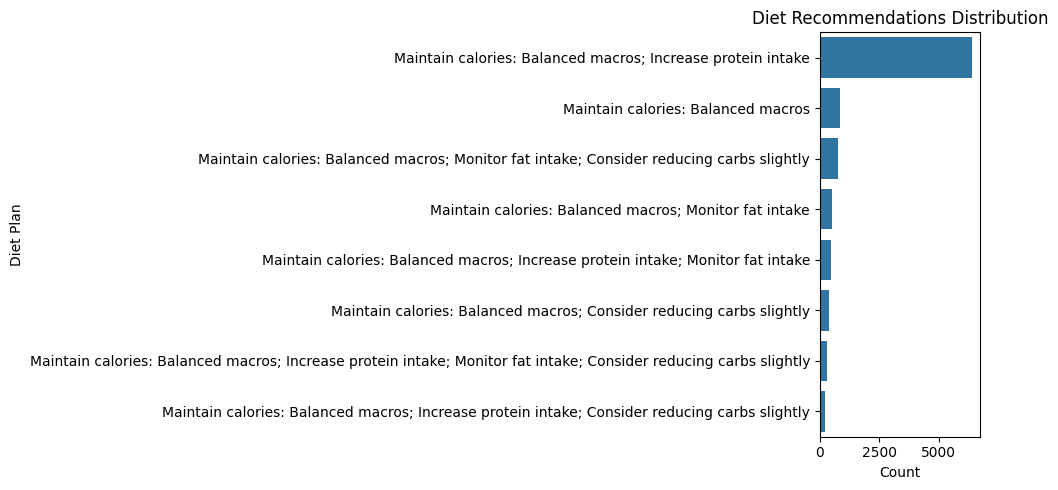

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(y='diet_recommendation', data=df, order=df['diet_recommendation'].value_counts().index)
plt.title("Diet Recommendations Distribution")
plt.xlabel("Count")
plt.ylabel("Diet Plan")
plt.tight_layout()
plt.show()


In [10]:
base_dir = os.path.join("D:", os.sep, "Projects", "SmartFit-SmartDiet", "data")
output_dir = os.path.join(base_dir, "processed", "recommendations")
os.makedirs(output_dir, exist_ok=True)

output_file = os.path.join(output_dir, "diet_recommendations.csv")

# Save your dataframe (df) here
df.to_csv(output_file, index=False)
print(f"Diet recommendations saved to: {output_file}")

Diet recommendations saved to: D:\Projects\SmartFit-SmartDiet\data\processed\recommendations\diet_recommendations.csv
